In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/Precog_hiring

/content/drive/MyDrive/Precog_hiring


In [ ]:
import numpy as np
import pandas as pd
from math import *
import tweepy
import csv
import json
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import datetime




**Accessing 10000 Tweets on "#AUSvsIND", the Most Trending Hashtag in New Delhi**

In [ ]:
####input your credentials here
consumer_key = 'efMVBDgzIQFYidGiFUBmKq8Zq'
consumer_secret = 'OuA7ABNMJndnN1HIjkGVhkWh96U4Aow7G4PrOFajopD0KDsZO6'
access_token = '1342485625342107648-VncXuw5OleHOXgC9NplQ0v0rHWSI7J'
access_token_secret = 'iFfpl9lokKBueD3yJO1UH57Pj9oDqh4aBh3Y2QVSemV1f'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
# Open/Create a file to append data
csvFile = open('ua.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)
d={}
i=0
Tweets=0

Lang=[]

for tweet in tweepy.Cursor(api.search,q="#AUSvsIND",count=100,since="2020-12-20").items():
    d[i]=tweet._json
    # print(i)

    i+=1
    Tweets+=1
    if Tweets==10000:
        break
    
with open("task2_tweets.json", "w") as outfile: 
    json.dump(d, outfile) 


    



In [ ]:
tweet

Status(_api=<tweepy.api.API object at 0x7ff9c06e3860>, _json={'created_at': 'Sat Dec 26 04:52:10 +0000 2020', 'id': 1342694673203138560, 'id_str': '1342694673203138560', 'text': 'Chumtiye big bash wale umpire 😑\n\n#AUSvsIND', 'truncated': False, 'entities': {'hashtags': [{'text': 'AUSvsIND', 'indices': [33, 42]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'tl', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 792011701147303937, 'id_str': '792011701147303937', 'name': 'Naman', 'screen_name': 'iamns3010', 'location': 'lost in my own thoughts', 'description': 'We All Are Hypocrites, When It Comes To Our Favourite 🖤', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'follower

In [ ]:
with open('task2_tweets.json') as f: 
    data = json.load(f)
js=data



In [ ]:
js['0']


{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Dec 27 10:06:27 +0000 2020',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 787580058,
    'id_str': '787580058',
    'indices': [3, 12],
    'name': 'Rathna kumar',
    'screen_name': 'MrRathna'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1343136150756552706,
 'id_str': '1343136150756552706',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 405,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Dec 27 07:08:14 +0000 2020',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_

In [ ]:
js['0'].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [ ]:
l=[]
for key in js:
    l.append(js[key])
df=pd.DataFrame(l)
df



,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_scope,withheld_copyright,withheld_in_countries
0,Sun Dec 27 10:06:27 +0000 2020,1343136150756552706,1343136150756552706,RT @MrRathna: Was benched almost for the entir...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1275262128522293250, 'id_str': '1275262...",None,None,None,None,{'created_at': 'Sun Dec 27 07:08:14 +0000 2020...,False,405,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Dec 27 10:05:54 +0000 2020,1343136012000587776,1343136012000587776,RT @KrisSrikkanth: Gem of an innings by @ajink...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1171726942850011136, 'id_str': '1171726...",None,None,None,None,{'created_at': 'Sun Dec 27 08:24:39 +0000 2020...,False,78,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Dec 27 10:05:51 +0000 2020,1343135999560302593,1343135999560302593,RT @MrRathna: Was benched almost for the entir...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1261865953958207490, 'id_str': '1261865...",None,None,None,None,{'created_at': 'Sun Dec 27 07:08:14 +0000 2020...,False,405,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Dec 27 10:05:51 +0000 2020,1343135998910160898,1343135998910160898,RT @MrRathna: Was benched almost for the entir...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1007468185971331073, 'id_str': '1007468...",None,None,None,None,{'created_at': 'Sun Dec 27 07:08:14 +0000 2020...,False,405,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Dec 27 10:05:33 +0000 2020,1343135925921054720,1343135925921054720,Guys I love these 2 😭😭😭 #jerusalema #AUSvsIND ...,False,"{'hashtags': [{'text': 'jerusalema', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 779922168, 'id_str': '779922168', 'name...",None,None,None,None,NaN,False,0,0,False,False,en,"{'media': [{'id': 1343134025465143306, 'id_str...",False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Sat Dec 26 04:52:31 +0000 2020,1342694761468084228,1342694761468084228,"Tim Paine was definitely out, terrible decisio...",False,"{'hashtags': [{'text': 'ausvsind', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 932426771215126528, 'id_str': '93242677...",None,None,None,None,NaN,False,0,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,Sat Dec 26 04:52:31 +0000 2020,1342694757961756677,1342694757961756677,Mumbai Property (Housing) Sale... Check at ht...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.theindiansubcontinent.com""...",NaN,None,NaN,None,None,"{'id': 107432899, 'id_str': '107432899', 'name...",None,None,None,None,NaN,False,0,0,False,False,en,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
9997,Sat Dec 26 04:52:24 +0000 2020,1342694730711232513,13426947

In [ ]:
df.to_csv("database.csv")

In [ ]:
DAD=pd.DataFrame(df['user'][0])

for i in tqdm(range(1,10000)):
    temp=pd.DataFrame(df['user'][i])
    if len(temp)==1:
        DAD=DAD.append(pd.DataFrame(df['user'][i]), ignore_index = True)
    else:
        DAD=DAD.append(pd.DataFrame(df['user'][i]).iloc[0,:], ignore_index = True)


DAD

100%|██████████| 9999/9999 [03:27<00:00, 48.15it/s]


,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,1275262128522293250,1275262128522293250,Sąɱ℘ąɬɧ 𝕵𝕯ツ,Sampath18628521,,thalapathy,None,{'urls': []},False,138,357,0,Tue Jun 23 02:59:30 +0000 2020,20785,None,None,False,False,12031,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337323748...,https://pbs.twimg.com/profile_images/133732374...,https://pbs.twimg.com/profile_banners/12752621...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
1,1171726942850011136,1171726942850011136,TheViralTweets.com 💬,TheViralTweeets,On Twitter,One and only exclusive website on the internet...,https://t.co/CJEqqp90S9,"{'urls': [{'url': 'https://t.co/OdDGUPchiB', '...",False,10,3,1,Wed Sep 11 10:07:46 +0000 2019,47,None,None,False,False,490,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1319587423...,https://pbs.twimg.com/profile_images/131958742...,https://pbs.twimg.com/profile_banners/11717269...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
2,1261865953958207490,1261865953958207490,ᴠᴀᴀᴛʜɪ !ᴊᴀɢᴀ!,VaathiiJaga,Tamilnadu,🤞ஜோக்கர் 🤯என்பதால் ஜீரோ இல்லை\n\n\nசீட்டு கட்ட...,None,{'urls': []},False,610,1137,0,Sun May 17 03:47:54 +0000 2020,16619,None,None,False,False,9626,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337017807...,https://pbs.twimg.com/profile_images/133701780...,https://pbs.twimg.com/profile_banners/12618659...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none
3,1007468185971331073,1007468185971331073,Excetra,karan_stark,,,None,{'urls': []},False,631,1707,0,Fri Jun 15 03:41:48 +0000 2018,146375,None,None,False,False,74885,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1336122808...,https://pbs.twimg.com/profile_images/133612280...,https://pbs.twimg.com/profile_banners/10074681...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
4,779922168,779922168,Lizo Sigalelana,LSigalelana,Cape Town,,None,{'urls': []},False,64,353,0,Sat Aug 25 09:02:29 +0000 2012,980,None,None,True,False,445,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1223050919...,https://pbs.twimg.com/profile_images/122305091...,https://pbs.twimg.com/profile_banners/77992216...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,932426771215126528,932426771215126528,Louis Biscoe,L_Biscoe,,,None,{'urls': []},False,8,187,0,Mon Nov 20 01:54:00 +0000 2017,1474,None,None,False,False,118,None,False,False,False,F5F8FA,None,None,False,http://abs.twimg.com/sticky/default_profile_im...,https://abs.twimg.com/sticky/default_profile_i...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,True,False,False,False,none
9996,107432899,107432899,insubcontinent,INSubcontinent,Bengaluru,Official https://t.co/WXfrS9OSH9 #followback #...,https://t.co/2qmLdmDyne,"{'urls': [{'url': 'https://t.co/WXfrS9OSH9', '...",False,15961,30,258,Fri Jan 22 15:00:05 +0000 2010,95853,None,None,False,False,944528,None,False,False,False,EBEBEB,http://abs.tw

In [ ]:
DAD.drop([0],inplace=True)
DAD

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
1,70948360,70948360,KingKohli12479,Virat12479,,"INDIA FIRST..\nJAI JAWAN, JAI KISAN..\nJAI HIN...",None,{'urls': []},False,161,276,2,Wed Sep 02 12:13:21 +0000 2009,4775,None,None,False,False,7451,False,False,False,000000,http://abs.twimg.com/images/themes/theme13/bg.gif,https://abs.twimg.com/images/themes/theme13/bg...,False,http://pbs.twimg.com/profile_images/2044700322...,https://pbs.twimg.com/profile_images/204470032...,https://pbs.twimg.com/profile_banners/70948360...,19CF86,000000,000000,000000,False,False,False,False,False,False,False,none
2,2362938901,2362938901,Parth Tank,parthtank28,"Vadodara, Gujarat",Stay real and stay loyal to me or else stay aw...,None,{'urls': []},False,251,483,1,Wed Feb 26 16:45:59 +0000 2014,36300,None,None,False,False,3156,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1254404842...,https://pbs.twimg.com/profile_images/125440484...,https://pbs.twimg.com/profile_banners/23629389...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
3,843862019283533824,843862019283533824,Yash Mittal 🇮🇳,im_yash2307,"Noida, India","Proud Hindu. India over everything. Also, an a...",https://t.co/fznCo0JgaX,{'urls': []},False,921,783,7,Mon Mar 20 16:29:18 +0000 2017,56516,None,None,False,False,42641,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1341844717...,https://pbs.twimg.com/profile_images/134184471...,https://pbs.twimg.com/profile_banners/84386201...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
4,1314146326972694528,1314146326972694528,Neha,IMMJ2____,Udaipur,,None,{'urls': []},False,28,62,0,Thu Oct 08 10:11:36 +0000 2020,10987,None,None,False,False,13333,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1342769438...,https://pbs.twimg.com/profile_images/134276943...,https://pbs.twimg.com/profile_banners/13141463...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
5,75954550,75954550,Slow-Flight-Spin,get2abhijit,"Aalen, Deutschland",Techie. Fitness enthusiast. Passionate about c...,None,{'urls': []},False,287,432,5,Mon Sep 21 04:11:03 +0000 2009,1008,None,None,True,False,5443,False,False,False,0099B9,http://abs.twimg.com/images/themes/theme4/bg.gif,https://abs.twimg.com/images/themes/theme4/bg.gif,True,http://pbs.twimg.com/profile_images/1329935265...,https://pbs.twimg.com/profile_images/132993526...,https://pbs.twimg.com/profile_banners/75954550...,0099B9,5ED4DC,95E8EC,3C3940,True,False,False,False,False,False,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,30199785,30199785,Doctor by Chance,iamthemaulik,india,"6'1'',\nDoctor, Actor, Writer.\nHigh functioni...",https://t.co/TezyhuzMoy,{'urls': []},False,1880,1088,24,Fri Apr 10 11:25:11 +0000 2009,34799,None,None,True,False,35771,False,False,False,000000,http://abs.twimg.com/images/themes/theme18/bg.gif,https://abs.twimg.com/images/themes/theme18/bg...,False,http://pbs.twimg.com/profile_images/1324681129...,https://pbs.twimg.com/profile_images/132468112...,https://pbs.twimg.com/profile_banners/30199785...,FA743E,000000,000

In [ ]:
DAD = DAD.reset_index(drop=True)
DAD

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,1275262128522293250,1275262128522293250,Sąɱ℘ąɬɧ 𝕵𝕯ツ,Sampath18628521,,thalapathy,None,{'urls': []},False,138,357,0,Tue Jun 23 02:59:30 +0000 2020,20785,None,None,False,False,12031,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337323748...,https://pbs.twimg.com/profile_images/133732374...,https://pbs.twimg.com/profile_banners/12752621...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
1,1171726942850011136,1171726942850011136,TheViralTweets.com 💬,TheViralTweeets,On Twitter,One and only exclusive website on the internet...,https://t.co/CJEqqp90S9,"{'urls': [{'url': 'https://t.co/OdDGUPchiB', '...",False,10,3,1,Wed Sep 11 10:07:46 +0000 2019,47,None,None,False,False,490,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1319587423...,https://pbs.twimg.com/profile_images/131958742...,https://pbs.twimg.com/profile_banners/11717269...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
2,1261865953958207490,1261865953958207490,ᴠᴀᴀᴛʜɪ !ᴊᴀɢᴀ!,VaathiiJaga,Tamilnadu,🤞ஜோக்கர் 🤯என்பதால் ஜீரோ இல்லை\n\n\nசீட்டு கட்ட...,None,{'urls': []},False,610,1137,0,Sun May 17 03:47:54 +0000 2020,16619,None,None,False,False,9626,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337017807...,https://pbs.twimg.com/profile_images/133701780...,https://pbs.twimg.com/profile_banners/12618659...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none
3,1007468185971331073,1007468185971331073,Excetra,karan_stark,,,None,{'urls': []},False,631,1707,0,Fri Jun 15 03:41:48 +0000 2018,146375,None,None,False,False,74885,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1336122808...,https://pbs.twimg.com/profile_images/133612280...,https://pbs.twimg.com/profile_banners/10074681...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
4,779922168,779922168,Lizo Sigalelana,LSigalelana,Cape Town,,None,{'urls': []},False,64,353,0,Sat Aug 25 09:02:29 +0000 2012,980,None,None,True,False,445,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1223050919...,https://pbs.twimg.com/profile_images/122305091...,https://pbs.twimg.com/profile_banners/77992216...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,932426771215126528,932426771215126528,Louis Biscoe,L_Biscoe,,,None,{'urls': []},False,8,187,0,Mon Nov 20 01:54:00 +0000 2017,1474,None,None,False,False,118,None,False,False,False,F5F8FA,None,None,False,http://abs.twimg.com/sticky/default_profile_im...,https://abs.twimg.com/sticky/default_profile_i...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,True,False,False,False,none
9996,107432899,107432899,insubcontinent,INSubcontinent,Bengaluru,Official https://t.co/WXfrS9OSH9 #followback #...,https://t.co/2qmLdmDyne,"{'urls': [{'url': 'https://t.co/WXfrS9OSH9', '...",False,15961,30,258,Fri Jan 22 15:00:05 +0000 2010,95853,None,None,False,False,944528,None,False,False,False,EBEBEB,http://abs.tw

In [ ]:
DAD.drop(['lang'], axis = 1,inplace=True)
DAD

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,1275262128522293250,1275262128522293250,Sąɱ℘ąɬɧ 𝕵𝕯ツ,Sampath18628521,,thalapathy,None,{'urls': []},False,138,357,0,Tue Jun 23 02:59:30 +0000 2020,20785,None,None,False,False,12031,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337323748...,https://pbs.twimg.com/profile_images/133732374...,https://pbs.twimg.com/profile_banners/12752621...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
1,1171726942850011136,1171726942850011136,TheViralTweets.com 💬,TheViralTweeets,On Twitter,One and only exclusive website on the internet...,https://t.co/CJEqqp90S9,"{'urls': [{'url': 'https://t.co/OdDGUPchiB', '...",False,10,3,1,Wed Sep 11 10:07:46 +0000 2019,47,None,None,False,False,490,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1319587423...,https://pbs.twimg.com/profile_images/131958742...,https://pbs.twimg.com/profile_banners/11717269...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
2,1261865953958207490,1261865953958207490,ᴠᴀᴀᴛʜɪ !ᴊᴀɢᴀ!,VaathiiJaga,Tamilnadu,🤞ஜோக்கர் 🤯என்பதால் ஜீரோ இல்லை\n\n\nசீட்டு கட்ட...,None,{'urls': []},False,610,1137,0,Sun May 17 03:47:54 +0000 2020,16619,None,None,False,False,9626,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337017807...,https://pbs.twimg.com/profile_images/133701780...,https://pbs.twimg.com/profile_banners/12618659...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none
3,1007468185971331073,1007468185971331073,Excetra,karan_stark,,,None,{'urls': []},False,631,1707,0,Fri Jun 15 03:41:48 +0000 2018,146375,None,None,False,False,74885,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1336122808...,https://pbs.twimg.com/profile_images/133612280...,https://pbs.twimg.com/profile_banners/10074681...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none
4,779922168,779922168,Lizo Sigalelana,LSigalelana,Cape Town,,None,{'urls': []},False,64,353,0,Sat Aug 25 09:02:29 +0000 2012,980,None,None,True,False,445,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1223050919...,https://pbs.twimg.com/profile_images/122305091...,https://pbs.twimg.com/profile_banners/77992216...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,932426771215126528,932426771215126528,Louis Biscoe,L_Biscoe,,,None,{'urls': []},False,8,187,0,Mon Nov 20 01:54:00 +0000 2017,1474,None,None,False,False,118,False,False,False,F5F8FA,None,None,False,http://abs.twimg.com/sticky/default_profile_im...,https://abs.twimg.com/sticky/default_profile_i...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,True,False,False,False,none
9996,107432899,107432899,insubcontinent,INSubcontinent,Bengaluru,Official https://t.co/WXfrS9OSH9 #followback #...,https://t.co/2qmLdmDyne,"{'urls': [{'url': 'https://t.co/WXfrS9OSH9', '...",False,15961,30,258,Fri Jan 22 15:00:05 +0000 2010,95853,None,None,False,False,944528,False,False,False,EBEBEB,http://abs.twimg.com/images/themes/theme7/bg.gif,https://

In [ ]:
langu=pd.DataFrame(df['lang'])
langu

,lang
0,en
1,en
2,en
3,en
4,en
...,...
9995,en
9996,en
9997,en
9998,en


In [ ]:
langu.value_counts()

lang
en      8849
hi       353
und      215
in       143
de       108
mr        70
et        51
ta        48
pa        21
kn        15
da        13
ar        12
bn        11
tl        11
te        11
ht        11
es         9
ur         7
fi         6
gu         4
ne         4
fr         4
sv         3
nl         3
pl         3
ml         3
sl         2
ja         2
ca         2
pt         1
eu         1
it         1
lv         1
no         1
vi         1
dtype: int64

In [ ]:
FINAL=pd.concat([DAD, langu], axis=1)
FINAL

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,lang
0,1275262128522293250,1275262128522293250,Sąɱ℘ąɬɧ 𝕵𝕯ツ,Sampath18628521,,thalapathy,None,{'urls': []},False,138,357,0,Tue Jun 23 02:59:30 +0000 2020,20785,None,None,False,False,12031,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337323748...,https://pbs.twimg.com/profile_images/133732374...,https://pbs.twimg.com/profile_banners/12752621...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none,en
1,1171726942850011136,1171726942850011136,TheViralTweets.com 💬,TheViralTweeets,On Twitter,One and only exclusive website on the internet...,https://t.co/CJEqqp90S9,"{'urls': [{'url': 'https://t.co/OdDGUPchiB', '...",False,10,3,1,Wed Sep 11 10:07:46 +0000 2019,47,None,None,False,False,490,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1319587423...,https://pbs.twimg.com/profile_images/131958742...,https://pbs.twimg.com/profile_banners/11717269...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none,en
2,1261865953958207490,1261865953958207490,ᴠᴀᴀᴛʜɪ !ᴊᴀɢᴀ!,VaathiiJaga,Tamilnadu,🤞ஜோக்கர் 🤯என்பதால் ஜீரோ இல்லை\n\n\nசீட்டு கட்ட...,None,{'urls': []},False,610,1137,0,Sun May 17 03:47:54 +0000 2020,16619,None,None,False,False,9626,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1337017807...,https://pbs.twimg.com/profile_images/133701780...,https://pbs.twimg.com/profile_banners/12618659...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,en
3,1007468185971331073,1007468185971331073,Excetra,karan_stark,,,None,{'urls': []},False,631,1707,0,Fri Jun 15 03:41:48 +0000 2018,146375,None,None,False,False,74885,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1336122808...,https://pbs.twimg.com/profile_images/133612280...,https://pbs.twimg.com/profile_banners/10074681...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,False,False,False,none,en
4,779922168,779922168,Lizo Sigalelana,LSigalelana,Cape Town,,None,{'urls': []},False,64,353,0,Sat Aug 25 09:02:29 +0000 2012,980,None,None,True,False,445,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1223050919...,https://pbs.twimg.com/profile_images/122305091...,https://pbs.twimg.com/profile_banners/77992216...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,False,False,False,none,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,932426771215126528,932426771215126528,Louis Biscoe,L_Biscoe,,,None,{'urls': []},False,8,187,0,Mon Nov 20 01:54:00 +0000 2017,1474,None,None,False,False,118,False,False,False,F5F8FA,None,None,False,http://abs.twimg.com/sticky/default_profile_im...,https://abs.twimg.com/sticky/default_profile_i...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,True,False,False,False,none,en
9996,107432899,107432899,insubcontinent,INSubcontinent,Bengaluru,Official https://t.co/WXfrS9OSH9 #followback #...,https://t.co/2qmLdmDyne,"{'urls': [{'url': 'https://t.co/WXfrS9OSH9', '...",False,15961,30,258,Fri Jan 22 15:00:05 +0000 2010,95853,None,None,False,False,944528,False,False,False,EBEBEB,http://abs.twimg.com/images/th

In [ ]:
FINAL.keys()

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'has_extended_profile',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications', 'translator_type', 'lang'],
      dtype='object')

**Final User DataFrame**

In [ ]:
user_df=FINAL[['id','name','screen_name','location','description','followers_count','friends_count','listed_count','created_at','favourites_count','statuses_count','lang']]
user_df



,id,name,screen_name,location,description,followers_count,friends_count,listed_count,created_at,favourites_count,statuses_count,lang
0,1275262128522293250,Sąɱ℘ąɬɧ 𝕵𝕯ツ,Sampath18628521,,thalapathy,138,357,0,Tue Jun 23 02:59:30 +0000 2020,20785,12031,en
1,1171726942850011136,TheViralTweets.com 💬,TheViralTweeets,On Twitter,One and only exclusive website on the internet...,10,3,1,Wed Sep 11 10:07:46 +0000 2019,47,490,en
2,1261865953958207490,ᴠᴀᴀᴛʜɪ !ᴊᴀɢᴀ!,VaathiiJaga,Tamilnadu,🤞ஜோக்கர் 🤯என்பதால் ஜீரோ இல்லை\n\n\nசீட்டு கட்ட...,610,1137,0,Sun May 17 03:47:54 +0000 2020,16619,9626,en
3,1007468185971331073,Excetra,karan_stark,,,631,1707,0,Fri Jun 15 03:41:48 +0000 2018,146375,74885,en
4,779922168,Lizo Sigalelana,LSigalelana,Cape Town,,64,353,0,Sat Aug 25 09:02:29 +0000 2012,980,445,en
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,932426771215126528,Louis Biscoe,L_Biscoe,,,8,187,0,Mon Nov 20 01:54:00 +0000 2017,1474,118,en
9996,107432899,insubcontinent,INSubcontinent,Bengaluru,Official https://t.co/WXfrS9OSH9 #followback #...,15961,30,258,Fri Jan 22 15:00:05 +0000 2010,95853,944528,en
9997,1135958772348678144,Raja Kishore,talesofkishore,New Delhi| Mumbai,,40,399,0,Tue Jun 04 17:17:31 +0000 2019,833,2081,en
9998,1168971183519387655,Jitendra 🌈,Jitendra7Jitu,Ranchi,"When You Value Yourself, People Will Too.😉 🕉 न...",376,444,0,Tue Sep 03 19:37:35 +0000 2019,4415,1804,en


In [ ]:
user_df['lang'].value_counts()

en     8849
hi      353
und     215
in      143
de      108
mr       70
et       51
ta       48
pa       21
kn       15
da       13
ar       12
ht       11
tl       11
bn       11
te       11
es        9
ur        7
fi        6
ne        4
fr        4
gu        4
sv        3
nl        3
pl        3
ml        3
ca        2
ja        2
sl        2
no        1
it        1
eu        1
lv        1
vi        1
pt        1
Name: lang, dtype: int64

**Top 20 Users with the Most Tweets**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


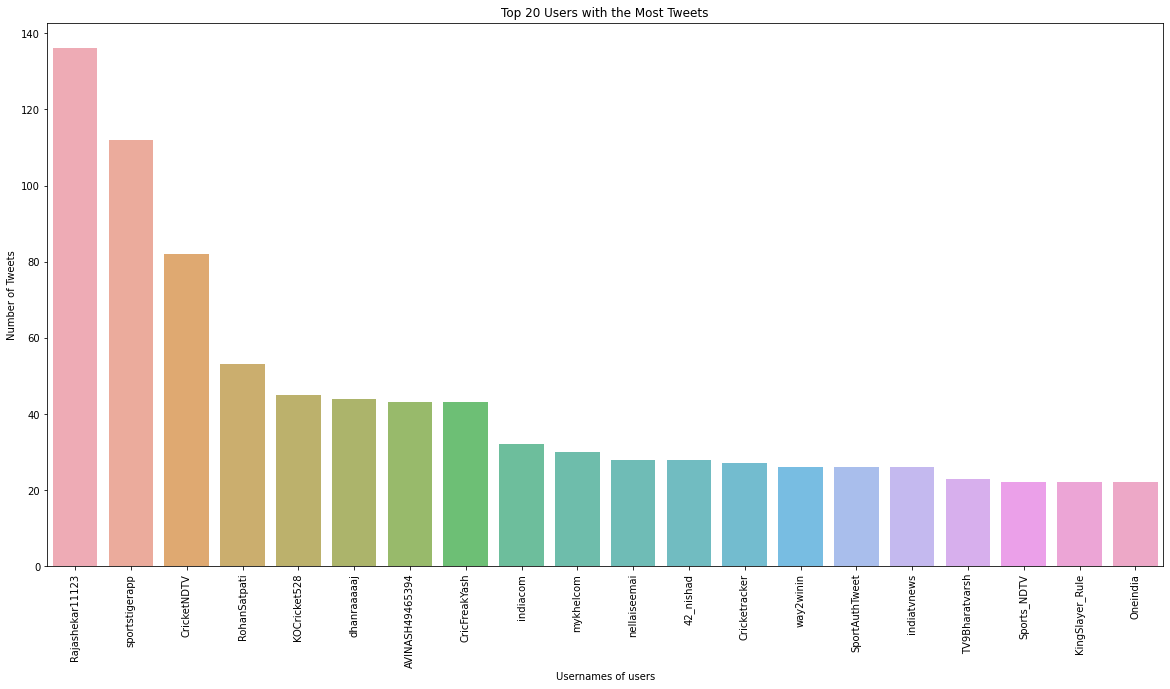

In [ ]:
user_count = user_df['screen_name'].value_counts()
user_count = user_count[:20,]
plt.figure(figsize=(20,10))
sns.barplot(user_count.index, user_count.values, alpha=0.8)
plt.title('Top 20 Users with the Most Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Usernames of users')
plt.xticks(rotation=90)
plt.show()

In [ ]:
user_df['location'].value_counts()

                                2908
India                            741
Hyderabad, India                 303
New Delhi, India                 248
Mumbai, India                    225
                                ... 
Mahadev Ki Nagri(Varanasi)         1
Hyderabad / Bangalore, India       1
Republic of Mauritius              1
Between TG and AP                  1
tirupati                           1
Name: location, Length: 1969, dtype: int64

**Top 20 Locations of the Tweets**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


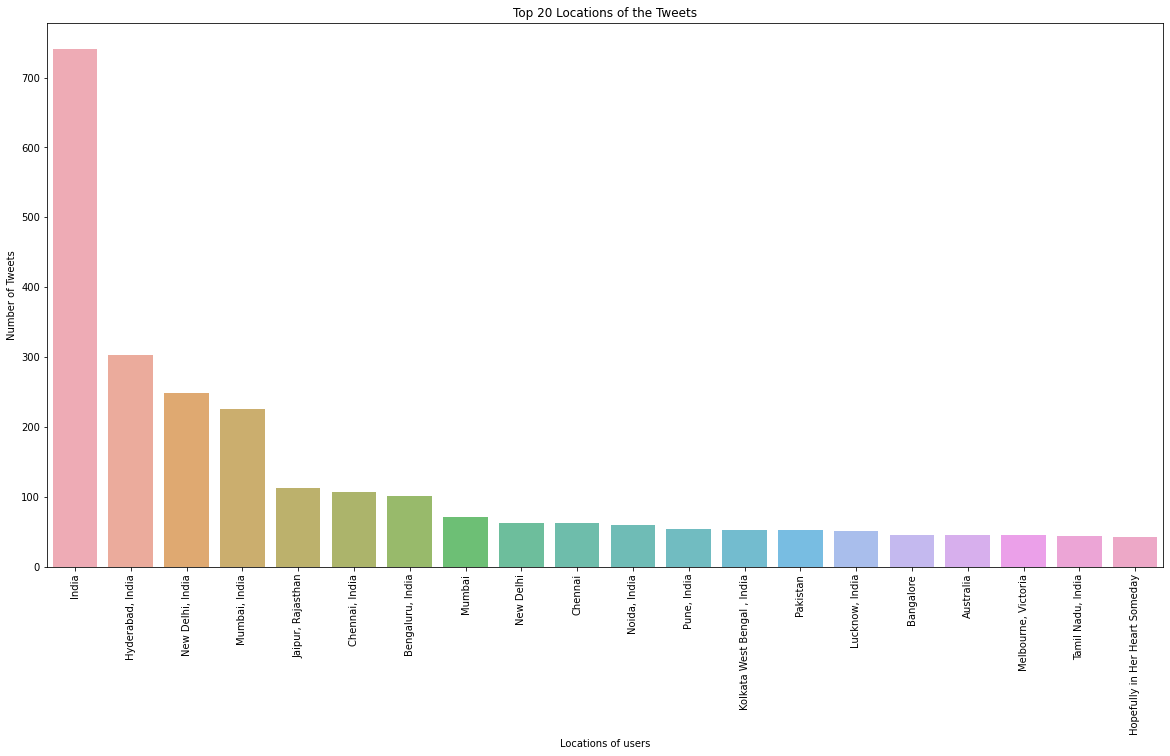

In [ ]:
user_count = user_df['location'].value_counts()[1:]
user_count = user_count[:20,]
plt.figure(figsize=(20,10))
sns.barplot(user_count.index, user_count.values, alpha=0.8)
plt.title('Top 20 Locations of the Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Locations of users')
plt.xticks(rotation=90)
plt.show()

**Top 20 Languages of the Tweets**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


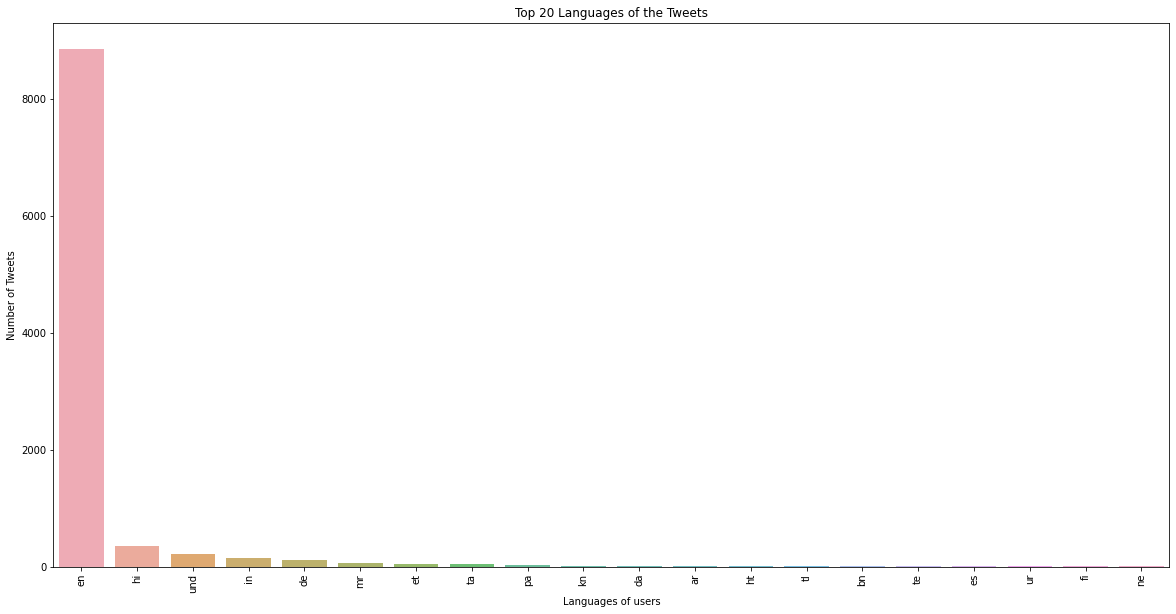

In [ ]:
user_count = user_df['lang'].value_counts()
user_count = user_count[:20,]
plt.figure(figsize=(20,10))
sns.barplot(user_count.index, user_count.values, alpha=0.8)
plt.title('Top 20 Languages of the Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Languages of users')
plt.xticks(rotation=90)
plt.show()

In [ ]:
DF= user_df[user_df['created_at'].notna()]
for i in range(len(DF)):
    tt=DF['created_at'][i]
    val=tt[4:10]+tt[-5:]
    # print(val)
    DF['created_at'][i]=val


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
months=["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# x = datetime.datetime(2020, 5, 17)
for i in range(len(DF)):
    yy=int(DF['created_at'][i][-4:])
    mm=months.index(DF['created_at'][i][:3])
    dd=int(DF['created_at'][i][4:6])
    DF['created_at'][i]=datetime.date(yy,mm,dd)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
DF['created_at'].value_counts()

2018-07-10    137
2020-02-12    113
2009-09-04     83
2020-04-28     54
2020-02-29     47
             ... 
2016-02-07      1
2015-04-05      1
2008-04-12      1
2019-03-12      1
2016-12-30      1
Name: created_at, Length: 2950, dtype: int64

**Top 20 Dates of UserID creations**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


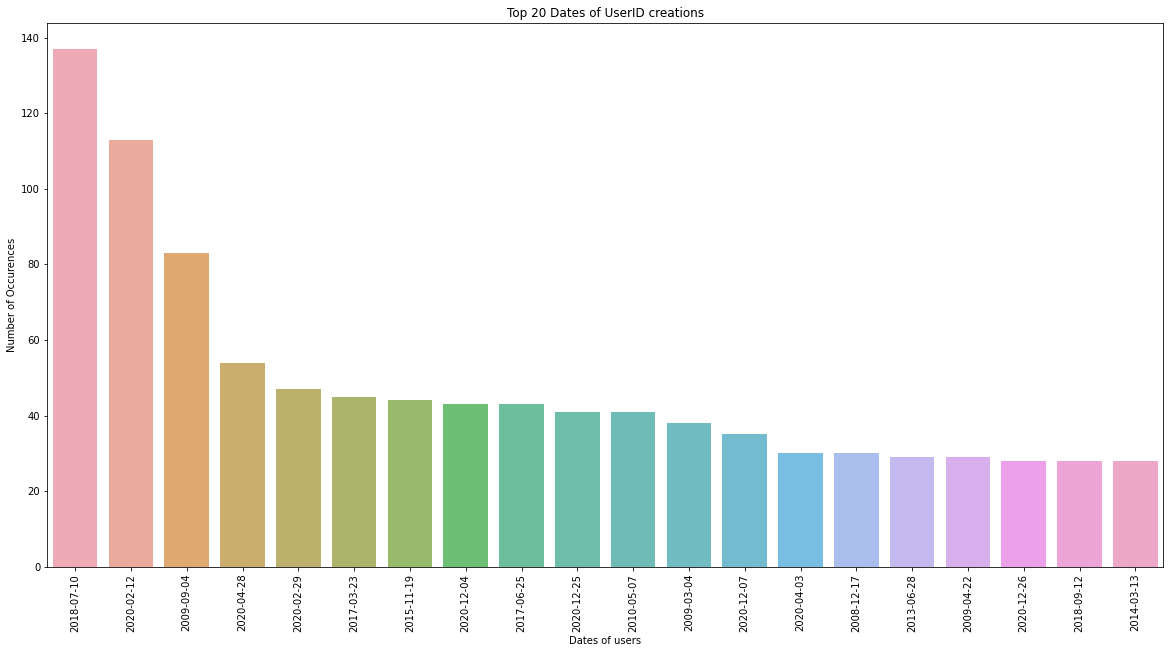

In [ ]:
user_count = DF['created_at'].value_counts()
user_count = user_count[:20,]
plt.figure(figsize=(20,10))
sns.barplot(user_count.index, user_count.values, alpha=0.8)
plt.title('Top 20 Dates of UserID creations')
plt.ylabel('Number of Occurences')
plt.xlabel('Dates of users')
plt.xticks(rotation=90)
plt.show()

In [ ]:
user_df

,id,name,screen_name,location,description,followers_count,friends_count,listed_count,created_at,favourites_count,statuses_count,lang
0,1275262128522293250,Sąɱ℘ąɬɧ 𝕵𝕯ツ,Sampath18628521,,thalapathy,138,357,0,Tue Jun 23 02:59:30 +0000 2020,20785,12031,en
1,1171726942850011136,TheViralTweets.com 💬,TheViralTweeets,On Twitter,One and only exclusive website on the internet...,10,3,1,Wed Sep 11 10:07:46 +0000 2019,47,490,en
2,1261865953958207490,ᴠᴀᴀᴛʜɪ !ᴊᴀɢᴀ!,VaathiiJaga,Tamilnadu,🤞ஜோக்கர் 🤯என்பதால் ஜீரோ இல்லை\n\n\nசீட்டு கட்ட...,610,1137,0,Sun May 17 03:47:54 +0000 2020,16619,9626,en
3,1007468185971331073,Excetra,karan_stark,,,631,1707,0,Fri Jun 15 03:41:48 +0000 2018,146375,74885,en
4,779922168,Lizo Sigalelana,LSigalelana,Cape Town,,64,353,0,Sat Aug 25 09:02:29 +0000 2012,980,445,en
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,932426771215126528,Louis Biscoe,L_Biscoe,,,8,187,0,Mon Nov 20 01:54:00 +0000 2017,1474,118,en
9996,107432899,insubcontinent,INSubcontinent,Bengaluru,Official https://t.co/WXfrS9OSH9 #followback #...,15961,30,258,Fri Jan 22 15:00:05 +0000 2010,95853,944528,en
9997,1135958772348678144,Raja Kishore,talesofkishore,New Delhi| Mumbai,,40,399,0,Tue Jun 04 17:17:31 +0000 2019,833,2081,en
9998,1168971183519387655,Jitendra 🌈,Jitendra7Jitu,Ranchi,"When You Value Yourself, People Will Too.😉 🕉 न...",376,444,0,Tue Sep 03 19:37:35 +0000 2019,4415,1804,en


In [ ]:
max(user_df['statuses_count'])

1403511

**Follower Count Pie Chart**

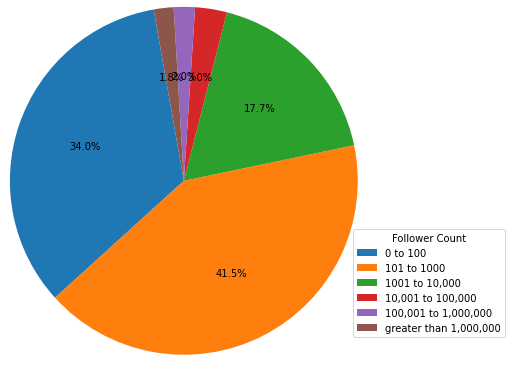

In [ ]:
x=[100,1000,10000,100000,1000000]
y=[0,0,0,0,0,0]
for i in range(len(user_df)):
    if user_df['followers_count'][i]<=100:
        y[0]+=1
    elif user_df['followers_count'][i]<=1000:
        y[1]+=1
    elif user_df['followers_count'][i]<=10000:
        y[2]+=1
    elif user_df['followers_count'][i]<=100000:
        y[3]+=1
    elif user_df['followers_count'][i]<=1000000:
        y[4]+=1
    else:
        y[5]+=1

plt.pie(y,startangle=100, radius=2, autopct='%1.1f%%')
legend_=['0 to 100','101 to 1000','1001 to 10,000','10,001 to 100,000','100,001 to 1,000,000','greater than 1,000,000']
plt.legend(legend_,loc="upper right", title='Follower Count', bbox_to_anchor=(2.0,0.3))
plt.show()


**Friends Count Pie Chart**

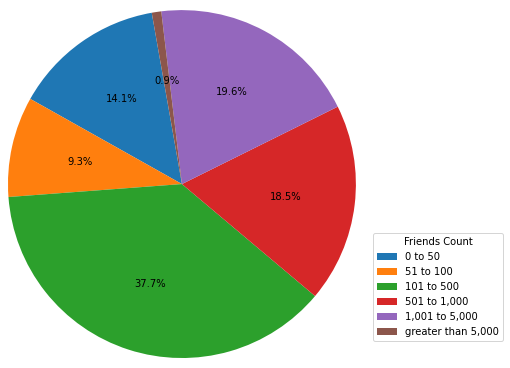

In [ ]:
x=[50,100,500,1000,5000]
y=[0,0,0,0,0,0]
for i in range(len(user_df)):
    if user_df['friends_count'][i]<=50:
        y[0]+=1
    elif user_df['friends_count'][i]<=100:
        y[1]+=1
    elif user_df['friends_count'][i]<=500:
        y[2]+=1
    elif user_df['friends_count'][i]<=1000:
        y[3]+=1
    elif user_df['friends_count'][i]<=5000:
        y[4]+=1
    else:
        y[5]+=1

plt.pie(y,startangle=100, radius=2, autopct='%1.1f%%')
legend_=['0 to 50','51 to 100','101 to 500','501 to 1,000','1,001 to 5,000','greater than 5,000']
plt.legend(legend_,loc="upper right", title='Friends Count', bbox_to_anchor=(2.0,0.3))
plt.show()


**Listed Count Pie Chart**

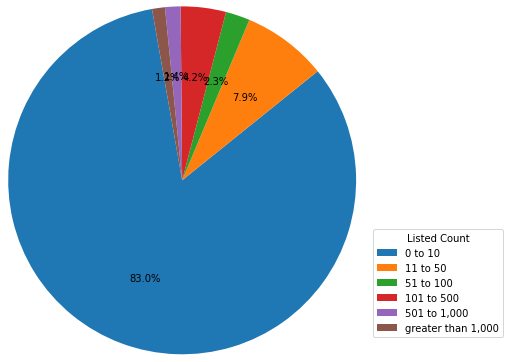

In [ ]:
x=[10,50,100,500,1000]
y=[0,0,0,0,0,0]
for i in range(len(user_df)):
    if user_df['listed_count'][i]<=10:
        y[0]+=1
    elif user_df['listed_count'][i]<=50:
        y[1]+=1
    elif user_df['listed_count'][i]<=100:
        y[2]+=1
    elif user_df['listed_count'][i]<=500:
        y[3]+=1
    elif user_df['listed_count'][i]<=1000:
        y[4]+=1
    else:
        y[5]+=1

plt.pie(y,startangle=100, radius=2, autopct='%1.1f%%')
legend_=['0 to 10','11 to 50','51 to 100','101 to 500','501 to 1,000','greater than 1,000']
plt.legend(legend_,loc="upper right", title='Listed Count', bbox_to_anchor=(2.0,0.3))
plt.show()


**Favourites Count Pie Chart**

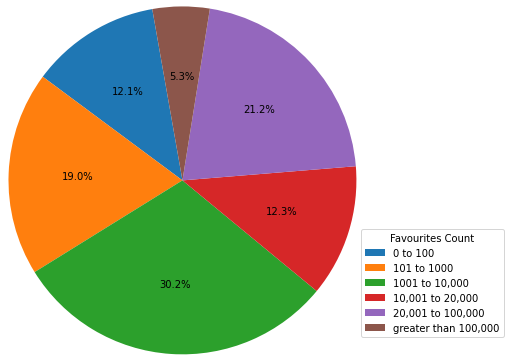

In [ ]:
x=[100,1000,10000,20000,100000]
y=[0,0,0,0,0,0]
for i in range(len(user_df)):
    if user_df['favourites_count'][i]<=100:
        y[0]+=1
    elif user_df['favourites_count'][i]<=1000:
        y[1]+=1
    elif user_df['favourites_count'][i]<=10000:
        y[2]+=1
    elif user_df['favourites_count'][i]<=20000:
        y[3]+=1
    elif user_df['favourites_count'][i]<=100000:
        y[4]+=1
    else:
        y[5]+=1

plt.pie(y,startangle=100, radius=2, autopct='%1.1f%%')
legend_=['0 to 100','101 to 1000','1001 to 10,000','10,001 to 20,000','20,001 to 100,000','greater than 100,000']
plt.legend(legend_,loc="upper right", title='Favourites Count', bbox_to_anchor=(2.0,0.3))
plt.show()


**Status Count Pie Chart**

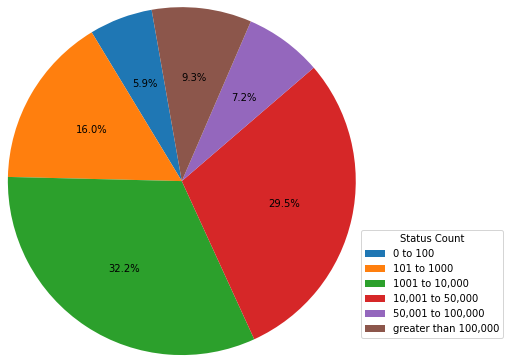

In [ ]:
x=[100,1000,10000,50000,100000]
y=[0,0,0,0,0,0]
for i in range(len(user_df)):
    if user_df['statuses_count'][i]<=100:
        y[0]+=1
    elif user_df['statuses_count'][i]<=1000:
        y[1]+=1
    elif user_df['statuses_count'][i]<=10000:
        y[2]+=1
    elif user_df['statuses_count'][i]<=50000:
        y[3]+=1
    elif user_df['statuses_count'][i]<=100000:
        y[4]+=1
    else:
        y[5]+=1

plt.pie(y,startangle=100, radius=2, autopct='%1.1f%%')
legend_=['0 to 100','101 to 1000','1001 to 10,000','10,001 to 50,000','50,001 to 100,000','greater than 100,000']
plt.legend(legend_,loc="upper right", title='Status Count', bbox_to_anchor=(2.0,0.3))
plt.show()


In [ ]:
js['0']

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Dec 27 10:06:27 +0000 2020',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 787580058,
    'id_str': '787580058',
    'indices': [3, 12],
    'name': 'Rathna kumar',
    'screen_name': 'MrRathna'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1343136150756552706,
 'id_str': '1343136150756552706',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 405,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Dec 27 07:08:14 +0000 2020',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_

In [ ]:
len(js.keys())

10000

In [ ]:
Tweet_text=[]
for key in js:
    Tweet_text.append(js[key]['text']+" ")
    

In [ ]:
TWEETS=''.join(Tweet_text)

In [ ]:
len(TWEETS)

1178187

In [ ]:
TWEETS

'RT @MrRathna: Was benched almost for the entire IPL. Came to Australia &amp; played in India A Team. Now without Kohli, K.L.Rahul, R.Sharma, H.… RT @KrisSrikkanth: Gem of an innings by @ajinkyarahane88 a magnificent century and great support from @imjadeja! Any lead above 100 is goin… RT @MrRathna: Was benched almost for the entire IPL. Came to Australia &amp; played in India A Team. Now without Kohli, K.L.Rahul, R.Sharma, H.… RT @MrRathna: Was benched almost for the entire IPL. Came to Australia &amp; played in India A Team. Now without Kohli, K.L.Rahul, R.Sharma, H.… Guys I love these 2 😭😭😭 #jerusalema #AUSvsIND #samkelo @__LeSupa  &amp; @presh_rabbit  💕😍 https://t.co/tnxormmI6V RT @Brad_Hogg: Century!!!! Rahane you legend. When moments need to be made, great leaders stand up. Well done Captain Rahane.  #INDvsAUS #c… RT @kumarmanish9: Leaders Lead From The Front. \n#AjinkyaRahane stands tall with a gutsy hundred under immense pressure. He has made the bes… RT @MrRathna: Was benched 

In [ ]:
with open("Tweets_text.txt", "w") as text_file:
    text_file.write(TWEETS)

**Word Cloud for Tweets**

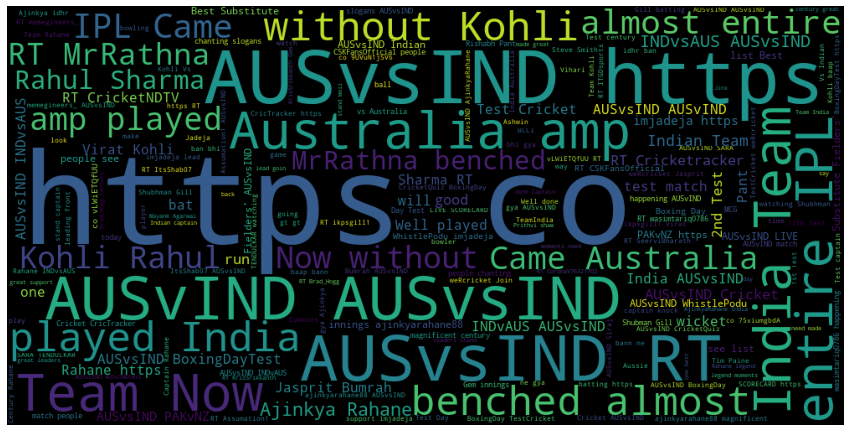

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords = STOPWORDS,width = 1000, height = 500).generate(TWEETS)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
lines = (line.strip() for line in TWEETS.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
TWEETS = 'n'.join(chunk for chunk in chunks if chunk)


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# print(stop_words)

#tokenise the data set
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(TWEETS)
# print(words)

# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]
# print(wordsFiltered)

# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
# print(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Word Cloud for Tweets after tokenizing, stopword removal and preprocessing**

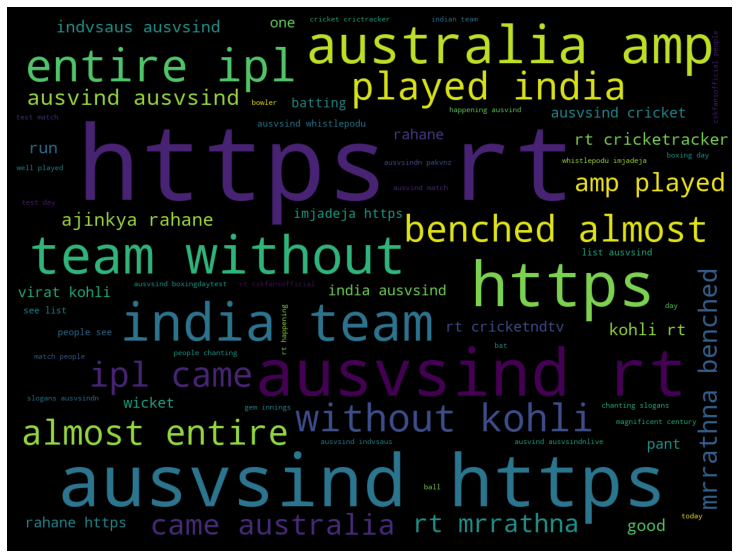

In [ ]:
wc = WordCloud(max_words=1000, margin=10, background_color='black',
scale=3, relative_scaling = 0.5, width=400, height=300,
random_state=1).generate(' '.join(filtered_words))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()